In [15]:
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
%matplotlib inline

In [20]:
%run ./SmallestZeroNorm.ipynb

In [17]:
class experiment:
    """
    Comparing the ell_0 regularization with Lasso.

    Criteria : cross validattion of mean square error (MSE)
    inputs : factor matrix F, observation vector y, number of folds for cross validation
    output : two vectors of cross validation MSE for two methods
    
    
    Attributes
    -----------------
    F : factor matrix
    y : dependent vector
    mseZero : vector of cross validation MSE for the ell_0 penalization
    mseOne : vector of cross validation MSE for the ell_1 Lasso penalization
    
    """
    
    def __init__(self, F, y, folds=5):
        self.F = F
        self.y = y
    
        
        kf = KFold(n_splits=folds, shuffle=True, random_state=19)
        mseZero = [] # MSE for the ell_0 regularization
        mseOne = [] # MSE for the ell_1 (lasso) regularizatio
        
        for train_index, test_index in kf.split(self.F):
            F_train, F_test = self.F[train_index], self.F[test_index]
            y_train, y_test = self.y[train_index], self.y[test_index]
    
            # SmallestZeroNorm evaluation
            model = optimize()
            model.fit(F_train, y_train)
            y_pred0 = F_test @ model.wHat # predicted values using ell_0 penalization
            mseZero.append(mean_squared_error(y_test, y_pred0))
    
            # Lasso evaluation
            model = Lasso(fit_intercept=False)
            model.fit(F_train, y_train)
            y_pred1 = model.predict(F_test) # predicted values using ell_1 penalization
            mseOne.append(mean_squared_error(y_test, y_pred1))
        
        self.mseZero = mseZero
        self.mseOne = mseOne

# Cross Validation Prediction Error:


### Exploring the effect of factors' dimension $d$, when $n$ and sparsity are fixed:

In [169]:
n = 50
dimension = np.arange(1000, 10000, 100)
mse0 = np.array([])
mse1 = np.array([])
for d in dimension:
    data = DGP(n, d, sparsity=0.15)
    data.sampleNoise(seedNum=911)
    data.sampleFactors(seedNum=911)
    data.sampleW(seedNum=911)
    data.generateY()
    
    exp = experiment(data.F, data.y)
    mse0 = np.append(mse0, np.mean(exp.mseZero))
    mse1 = np.append(mse1, np.mean(exp.mseOne))
    
# Evaluating the average mean square error (dividing by n) 
mse0 = mse0 / n
mse1 = mse1 / n

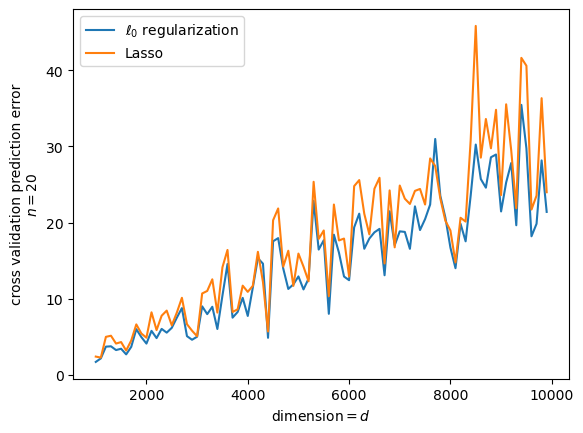

In [170]:
plt.plot(dimension, mse0, label=r'$\ell_0$ regularization')
plt.plot(dimension, mse1, label='Lasso')
plt.legend()
plt.xlabel(r'dimension$= d$')
plt.ylabel(r'cross validation prediction error' + '\n' + '$n = 20$')
plt.show()

### Exploring the effect of sparsity, when $n$ and $d$ are fixed:

In [152]:
n = 100
d = 8000
sparsity = np.linspace(0.05, 0.3, 100)
mse0 = np.array([])
mse1 = np.array([])
for s in sparsity:
    data = DGP(n, d, sparsity = s)
    data.sampleNoise(seedNum=21)
    data.sampleFactors(seedNum=21)
    data.sampleW(seedNum=21)
    data.generateY()
    
    exp = experiment(data.F, data.y)
    mse0 = np.append(mse0, np.mean(exp.mseZero))
    mse1 = np.append(mse1, np.mean(exp.mseOne))
    
# Evaluating the average mean square error (dividing by n) 
mse0 = mse0 / n
mse1 = mse1 / n

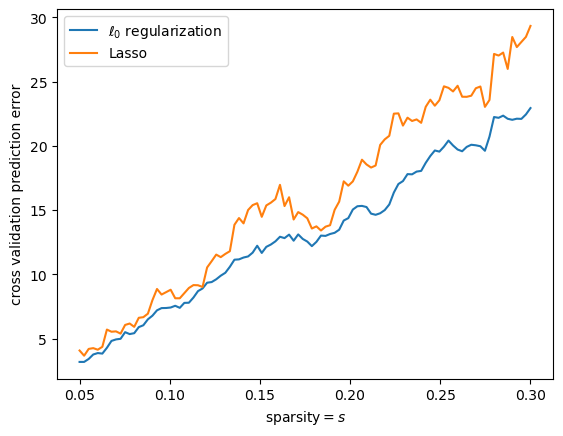

In [153]:
plt.plot(sparsity, mse0, label=r'$\ell_0$ regularization')
plt.plot(sparsity, mse1, label='Lasso')
plt.legend()
plt.xlabel(r'sparsity$= s$')
plt.ylabel(r'cross validation prediction error')
plt.show()